In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dfH = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv')

In [5]:
from sklearn.impute import SimpleImputer
# Identify columns with null values
columns_with_nulls = dfH.columns[dfH.isnull().any()]

# Choose a strategy for handling null values using 'mean'
imputer = SimpleImputer(strategy='mean') 

# Fit and transform the imputer on the specified columns
dfH[columns_with_nulls] = imputer.fit_transform(dfH[columns_with_nulls])


In [6]:
dfH.sample(5)

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
12761,7.0,2022-06-17,3,5.0,12.0,89,24.0,1,8.7
17931,104.0,2023-01-18,13,271.0,375.0,63,10.0,1,17.4
19589,354.0,2023-03-28,16,610.0,964.0,42,13.6,2,10.4
881,46.0,2021-02-06,21,62.0,108.0,66,3.3,3,6.0
9262,4.0,2022-01-22,7,34.0,38.0,39,-6.5,0,11.2


In [7]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

In [8]:
dfH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26280 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26280 non-null  float64
 4   Total_rides              26280 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [9]:
dfH.apply(lambda x: len(x.unique()))

Casual                      836
Date                       1095
Hour                         24
Member                     1160
Total_rides                1671
relativehumidity_2m (%)      96
temperature_2m (°C)         532
weathercode (wmo code)       13
windspeed_10m (km/h)        332
dtype: int64

In [10]:
dfH.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
dtype: int64

In [11]:
# Calculate the total number of rides
total_rides = dfH["Total_rides"].sum()
print("Total rides:", total_rides)

Total rides: 10698475.052723743


In [12]:
# Add a new column with an index as a counting number
dfH['Count'] = dfH.index

dfH.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),Count
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4


In [13]:

# Calculate the number of rides by member type
member_rides = dfH.groupby("Member")["Total_rides"].sum()
print("Rides by member type:\n", member_rides)

Rides by member type:
 Member
0.0         85.0
1.0        282.0
2.0        748.0
3.0       1312.0
4.0       1763.0
           ...  
1490.0    2185.0
1495.0    2242.0
1507.0    2185.0
1528.0    2175.0
1534.0    2262.0
Name: Total_rides, Length: 1160, dtype: float64


In [14]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides',
       'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)', 'Count'],
      dtype='object')

In [15]:
dfH = dfH.rename(columns={'weathercode (wmo code)':'weather',
                       'temperature_2m (°C)':'Temp',
                       'windspeed_10m (km/h)':'Windspeed',
                       'relativehumidity_2m (%)':'Humidity'})
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4


In [16]:
# Convert the 'Date' column to datetime format
dfH['Date'] = pd.to_datetime(dfH['Date'])

# Extract Month and Year from the 'Date' column
dfH['Month'] = dfH['Date'].dt.month
dfH['Year'] = dfH['Date'].dt.year

dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,1,2021
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,1,2021
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,1,2021


In [17]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
      return 'Winter'
    elif month in [3, 4, 5]:
      return 'Spring'
    elif month in [6, 7, 8]:
      return 'Summer'
    else:
      return 'Autumn'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfH['Season'] = dfH['Month'].apply(get_season)
dfH

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Season
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,Winter
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,Winter
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,1,2021,Winter
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,1,2021,Winter
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,1,2021,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,26275,12,2023,Winter
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,26276,12,2023,Winter
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,26277,12,2023,Winter
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,26278,12,2023,Winter


In [18]:
import pandas as pd

# Convert 'Date' column to datetime format
dfH['Date'] = pd.to_datetime(dfH['Date'])
dfH['day_of_week'] = dfH['Date'].dt.dayofweek

# Define functions to categorize days
def is_weekday(day):
    return day < 5  # Monday to Friday (0-4)

def is_weekend(day):
    return day >= 5  # Saturday (5) and Sunday (6)

# Create new columns for 'is_weekday' and 'is_weekend'
dfH['is_weekday'] = dfH['day_of_week'].apply(is_weekday)
dfH['is_weekend'] = dfH['day_of_week'].apply(is_weekend)

holidays = ['2023-01-01', '2023-12-25']  # Example: New Year's Day, Christmas Day

# Create a Series of booleans indicating whether each date is a holiday
dfH['is_holiday'] = dfH['Date'].isin(pd.to_datetime(holidays))

# Calculate 'is_working_day'
dfH['is_working_day'] = dfH['is_weekday'] & ~dfH['is_holiday'] 

# Example usage:
weekend_data = dfH[dfH['is_weekend']]
working_day_data = dfH[dfH['is_working_day']]

print(weekend_data)
print(working_day_data)
dfH.head(2)

       Casual       Date  Hour  Member  Total_rides  Humidity  Temp  weather  \
24        4.0 2021-01-02     0     8.0         12.0        99   5.2       61   
25        4.0 2021-01-02     1    10.0         14.0        99   5.1       51   
26        1.0 2021-01-02     2     0.0          1.0        98   5.2        3   
27        1.0 2021-01-02     3     1.0          2.0        98   4.0        3   
28        4.0 2021-01-02     4     2.0          6.0        98   4.4        3   
...       ...        ...   ...     ...          ...       ...   ...      ...   
26275   132.0 2023-12-31    19   190.0        322.0        71  -7.7        0   
26276   125.0 2023-12-31    20   194.0        319.0        79 -10.2        0   
26277    84.0 2023-12-31    21   137.0        221.0        80 -11.0        0   
26278    83.0 2023-12-31    22   142.0        225.0        80 -10.4        0   
26279    82.0 2023-12-31    23   106.0        188.0        73  -8.5        0   

       Windspeed  Count  Month  Year  S

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Season,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,Winter,4,True,False,False,True
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,Winter,4,True,False,False,True


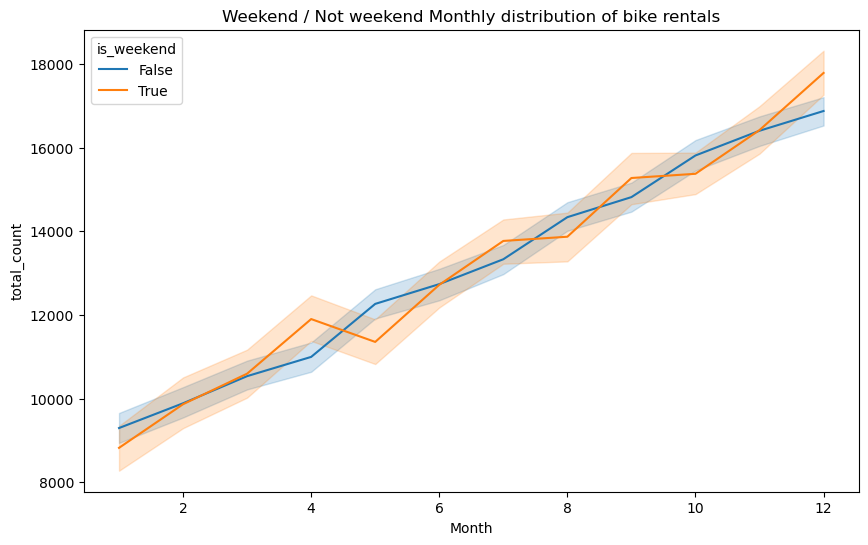

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and weekend/not weekend
sns.lineplot(x='Month', y='Count', hue='is_weekend', data=dfH, estimator='mean')

# Add title and labels
plt.title('Weekend / Not weekend Monthly distribution of bike rentals')
plt.xlabel('Month')
plt.ylabel('total_count')

# Show the plot
plt.show()

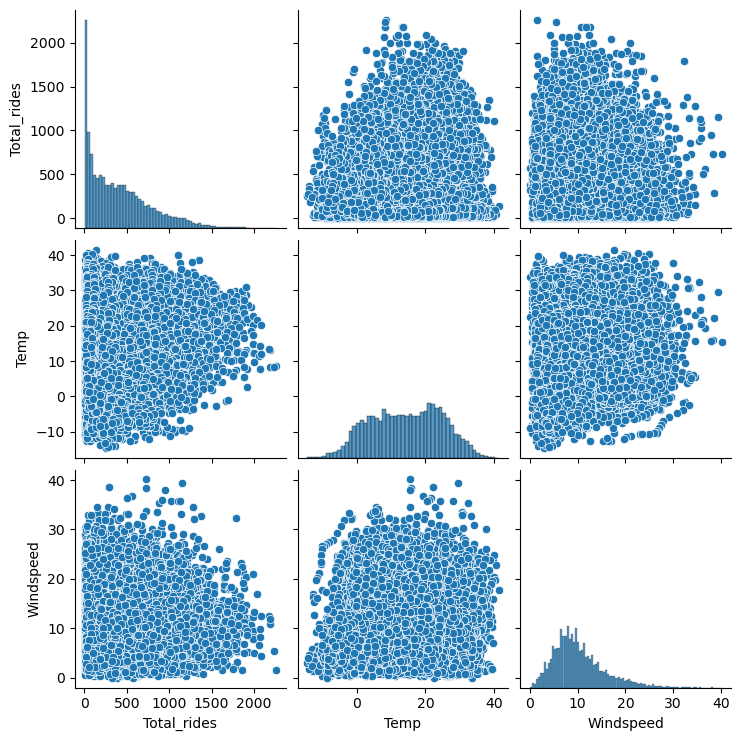

In [20]:
# Pair plot: Visualize relationships between multiple features
sns.pairplot(dfH[['Total_rides', 'Temp', 'Windspeed']])
plt.show()


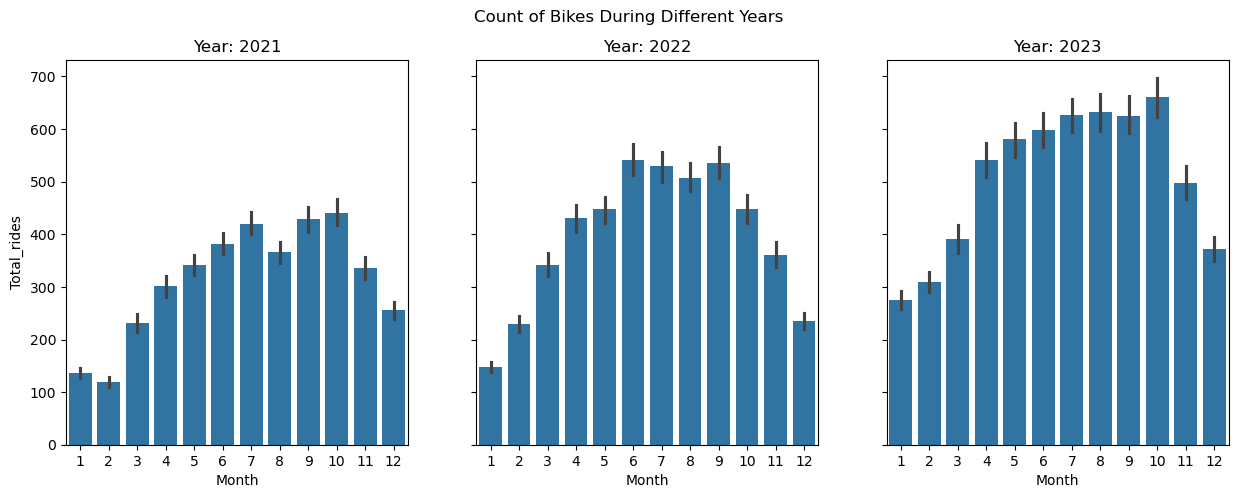

In [48]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()


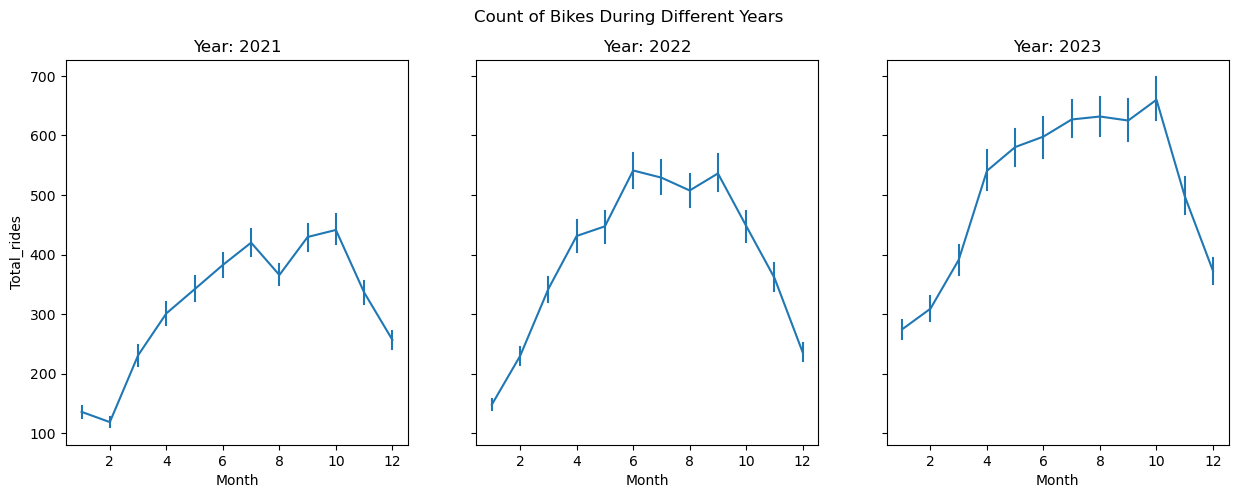

In [52]:
import matplotlib.pyplot as plt
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.lineplot(data=year_data, x='Month', y='Total_rides', ax=axes[i], err_style="bars")
    axes[i].set_title(f'Year: {year}')

plt.show()

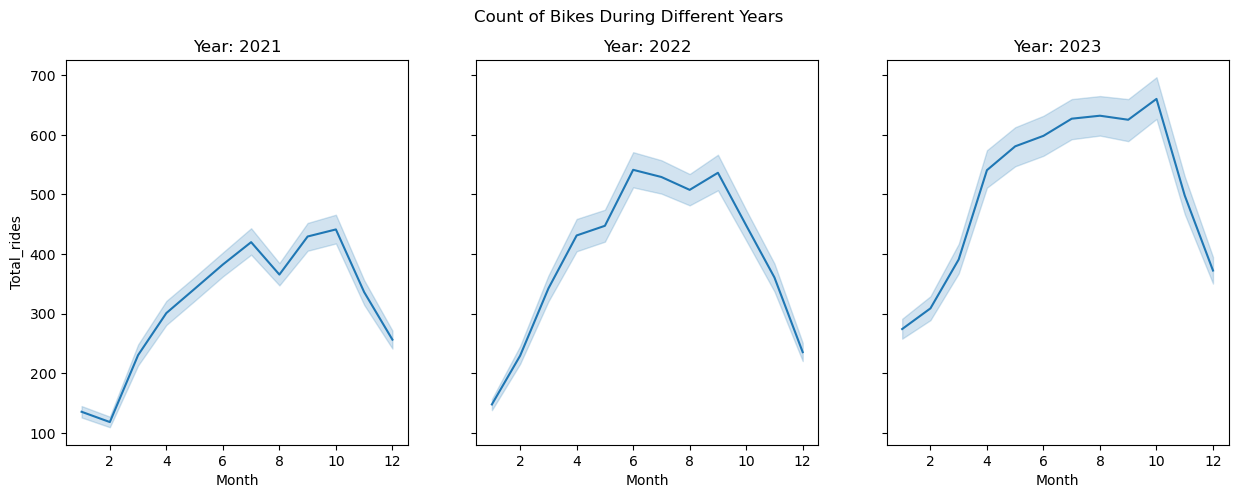

In [51]:
import matplotlib.pyplot as plt
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.lineplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

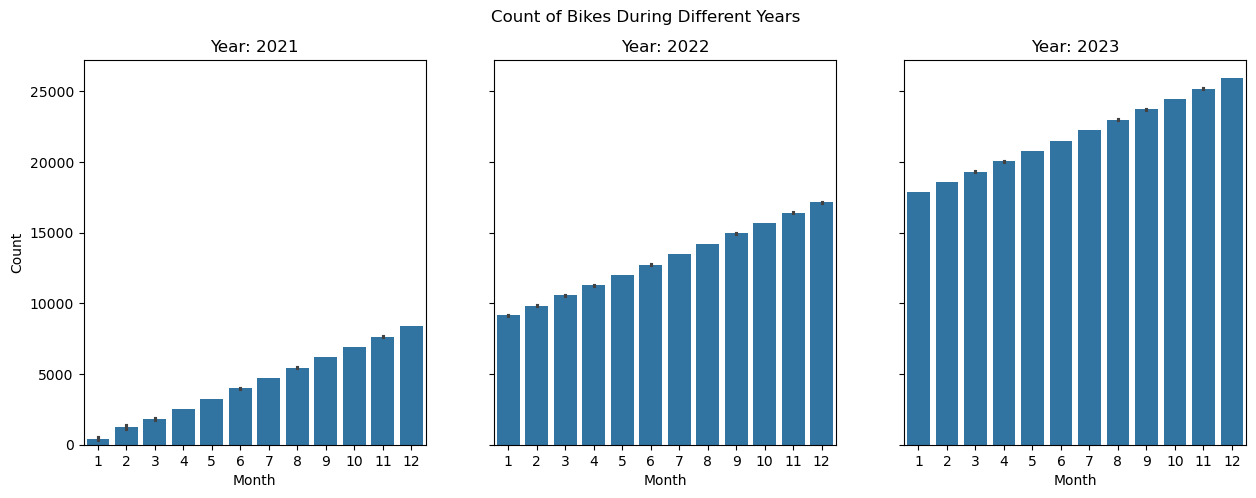

In [22]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Month', y='Count', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

In [23]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Count', 'Month', 'Year', 'Season',
       'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday',
       'is_working_day'],
      dtype='object')

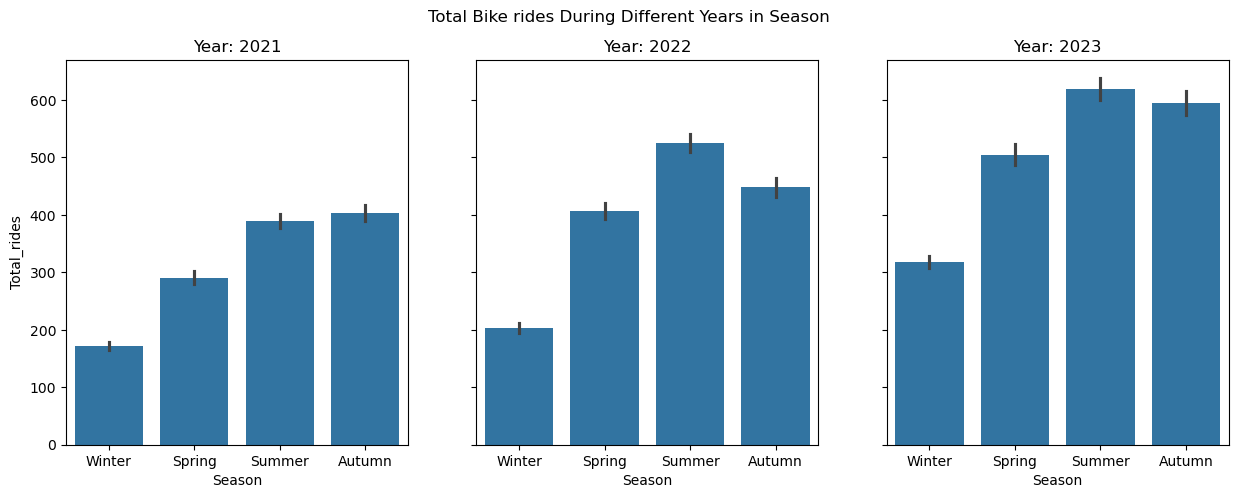

In [24]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Total Bike rides During Different Years in Season')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Season', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()


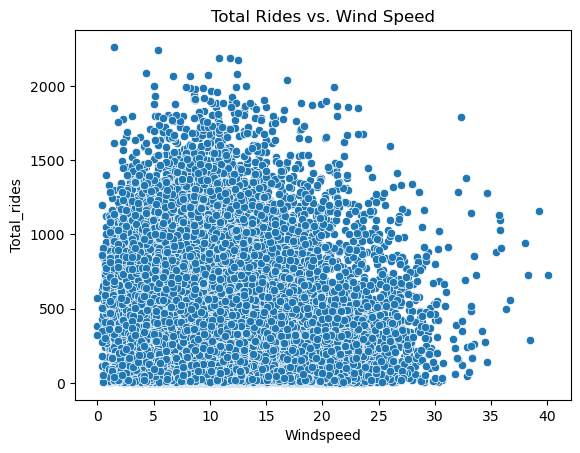

In [25]:
# Scatter plot: Total_rides vs. windspeed_10m_max
sns.scatterplot(x='Windspeed', y='Total_rides', data=dfH)
plt.title('Total Rides vs. Wind Speed')
plt.show()

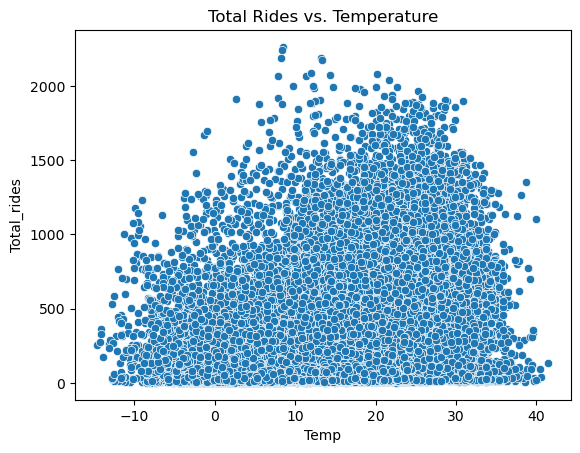

In [26]:

# Scatter plot: Total_rides vs. temperature_2m_mean
sns.scatterplot(x='Temp', y='Total_rides', data=dfH)
plt.title('Total Rides vs. Temperature')
plt.show()

In [27]:
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Season,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,Winter,4,True,False,False,True
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,Winter,4,True,False,False,True
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,1,2021,Winter,4,True,False,False,True
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,1,2021,Winter,4,True,False,False,True
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,1,2021,Winter,4,True,False,False,True


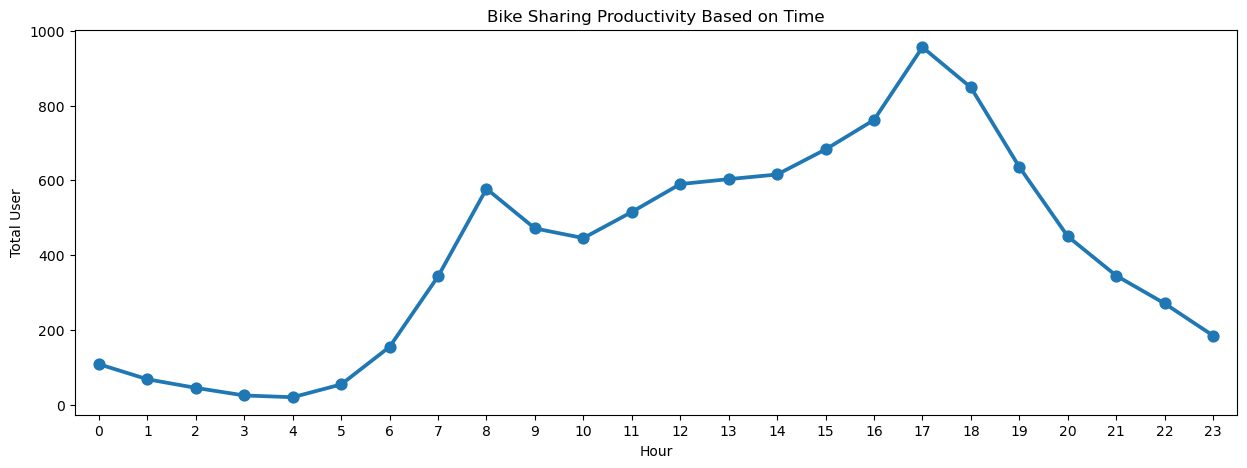

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=dfH, x='Hour', y='Total_rides', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity Based on Time')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()

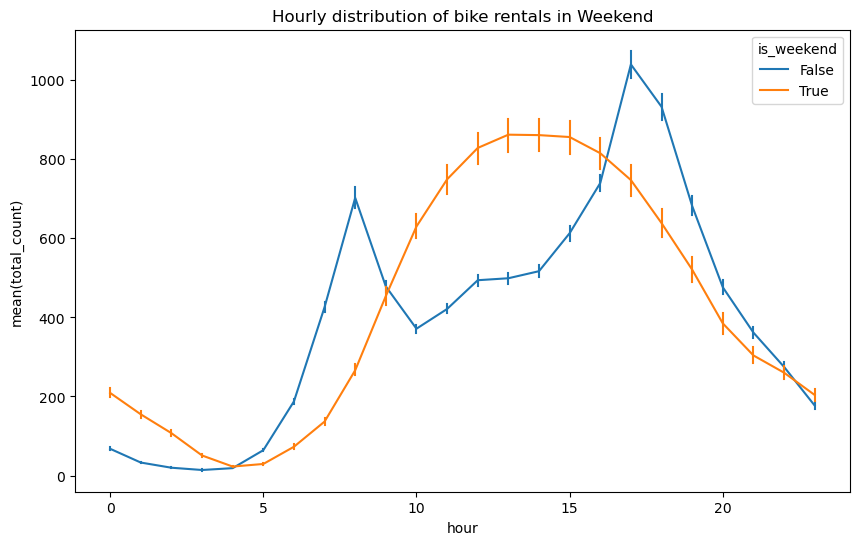

In [53]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Hour', y='Total_rides', data=dfH, hue='is_weekend', estimator='mean',err_style="bars")

# Add title and labels
plt.title('Hourly distribution of bike rentals in Weekend')
plt.xlabel('hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

[Text(0.5, 1.0, 'Bike Rides during Hours: Casual')]

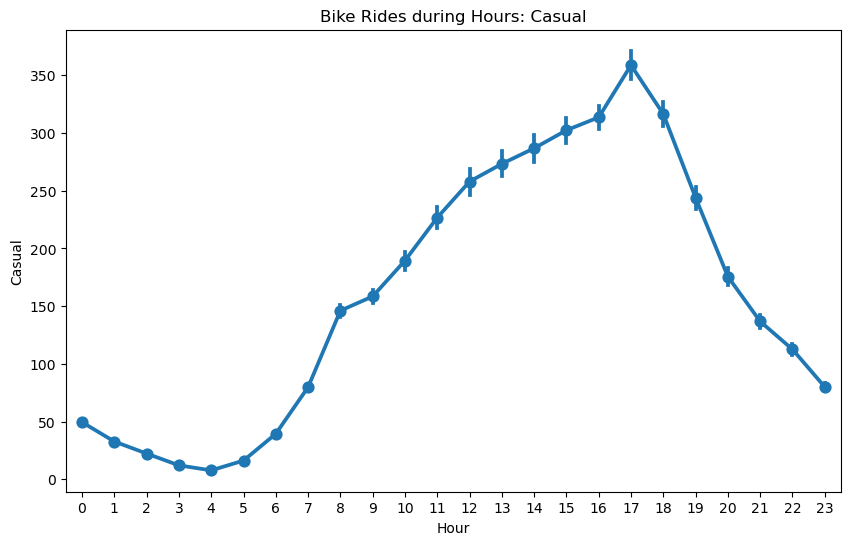

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=dfH, x='Hour', y='Casual', ax=ax)
ax.set(title='Bike Rides during Hours: Casual')

[Text(0.5, 1.0, ' Bike Ride during Hour: Members')]

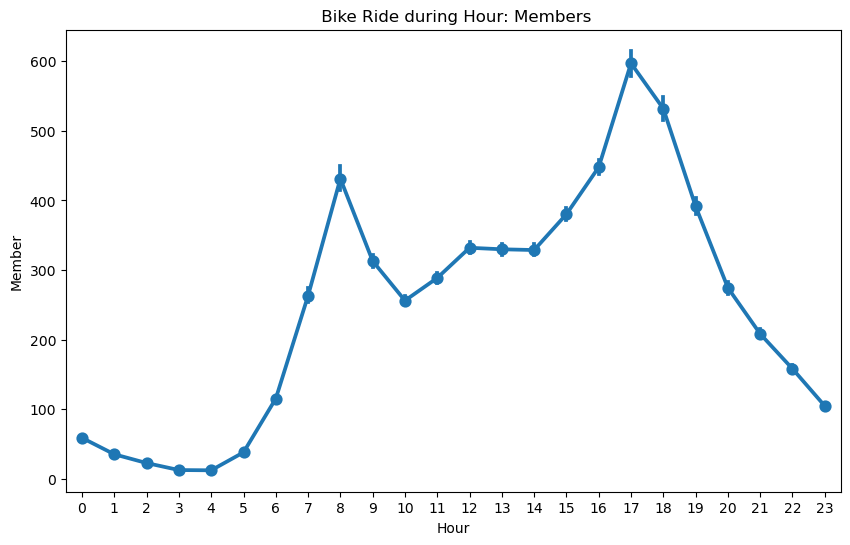

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sns.pointplot(data=dfH, x='Hour', y='Member', ax=ax)
ax.set(title=' Bike Ride during Hour: Members')

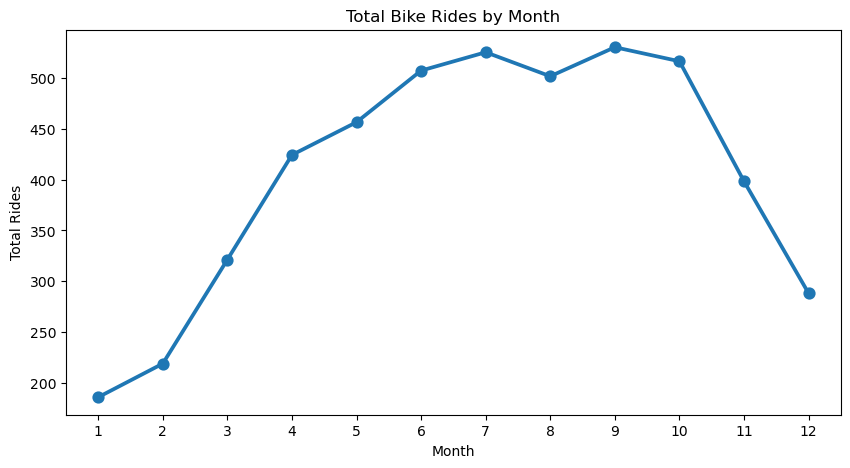

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=dfH, x='Month', y='Total_rides', errorbar=None, ax=ax)
ax.set(title='Total Bike Rides by Month')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Month')
plt.show()

[Text(0.5, 1.0, 'Toatl Bike Rides during different Season')]

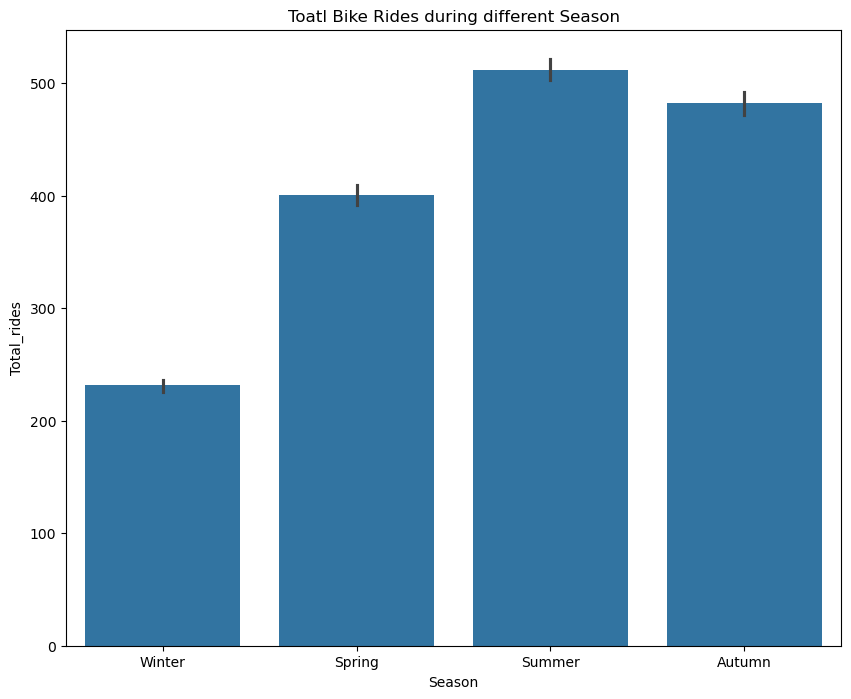

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=dfH, x='Season', y='Total_rides', ax=ax)
ax.set(title='Toatl Bike Rides during different Season')

In [34]:
# Define rush hour periods (you can customize these based on your data)
rush_hours = [(6, 10), (16, 20)]  # Morning and evening rush hours
def is_rush_hour(hour):
    for start, end in rush_hours:
      if start <= hour <= end:
        return 'Rush Hour'
    return 'Weak Hour'

# Apply the is_rush_hour function to the 'Hour' column and create a new 'Rush_Hour' column
dfH['Rush_Hour and Weak_hour'] = dfH['Hour'].apply(is_rush_hour)


In [35]:
dfH.head(2)

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Season,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day,Rush_Hour and Weak_hour
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,Winter,4,True,False,False,True,Weak Hour
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,Winter,4,True,False,False,True,Weak Hour


In [36]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Count', 'Month', 'Year', 'Season',
       'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday',
       'is_working_day', 'Rush_Hour and Weak_hour'],
      dtype='object')

[Text(0.5, 1.0, 'Total Bike Rides during Rush_Hour and Weak_hour')]

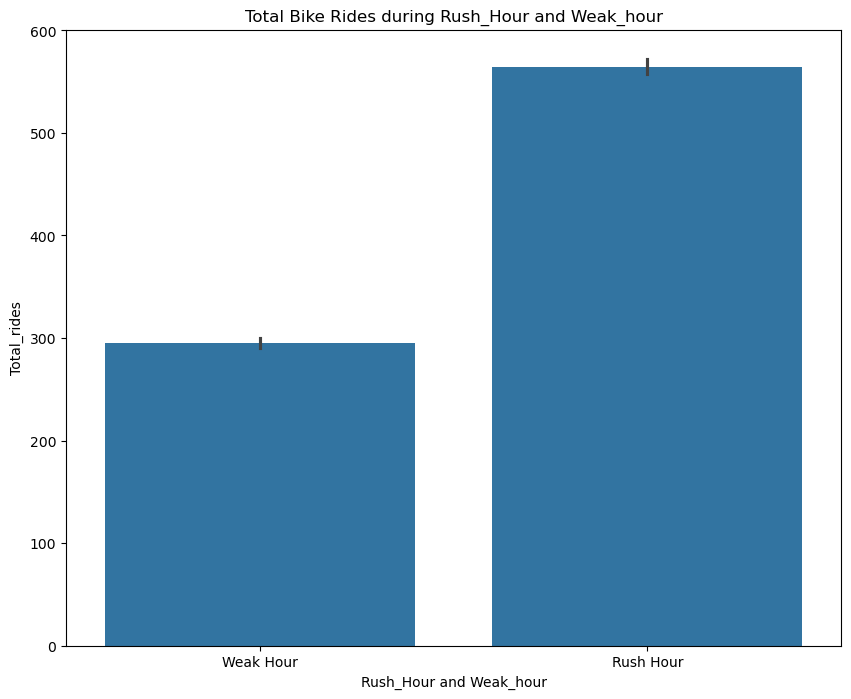

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=dfH, x='Rush_Hour and Weak_hour', y='Total_rides', ax=ax)
ax.set(title='Total Bike Rides during Rush_Hour and Weak_hour')

In [38]:
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Season,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day,Rush_Hour and Weak_hour
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,Winter,4,True,False,False,True,Weak Hour
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,Winter,4,True,False,False,True,Weak Hour
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,1,2021,Winter,4,True,False,False,True,Weak Hour
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,1,2021,Winter,4,True,False,False,True,Weak Hour
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,1,2021,Winter,4,True,False,False,True,Weak Hour


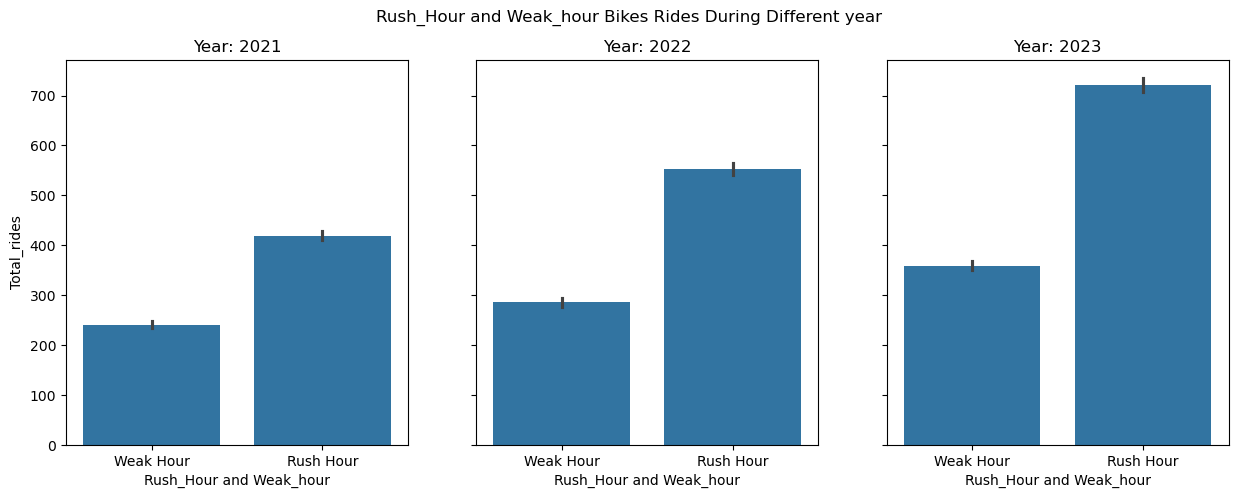

In [39]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Rush_Hour and Weak_hour Bikes Rides During Different year')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Rush_Hour and Weak_hour', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

# sns.countplot(x='Rush_Hour and Weak_hour', data=year_data, y='Total_rides', ax=axes[0])

# sns.countplot(x='qRush_Hour and Weak_hour', data=year_data, y='Total_rides', ax=axes[1])

# sns.countplot(x='qRush_Hour and Weak_hour', data=year_data, y='Total_rides', ax=axes[1])

# # Titles for each plot
# axes[0].set_title('Year 2021', alpha=0.8)
# axes[1].set_title('Year 2022', alpha=0.8)

# # Display the plot
# plt.show()

In [58]:
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Season,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day,Rush_Hour and Weak_hour
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,Winter,4,True,False,False,True,Weak Hour
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,Winter,4,True,False,False,True,Weak Hour
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,1,2021,Winter,4,True,False,False,True,Weak Hour
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,1,2021,Winter,4,True,False,False,True,Weak Hour
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,1,2021,Winter,4,True,False,False,True,Weak Hour


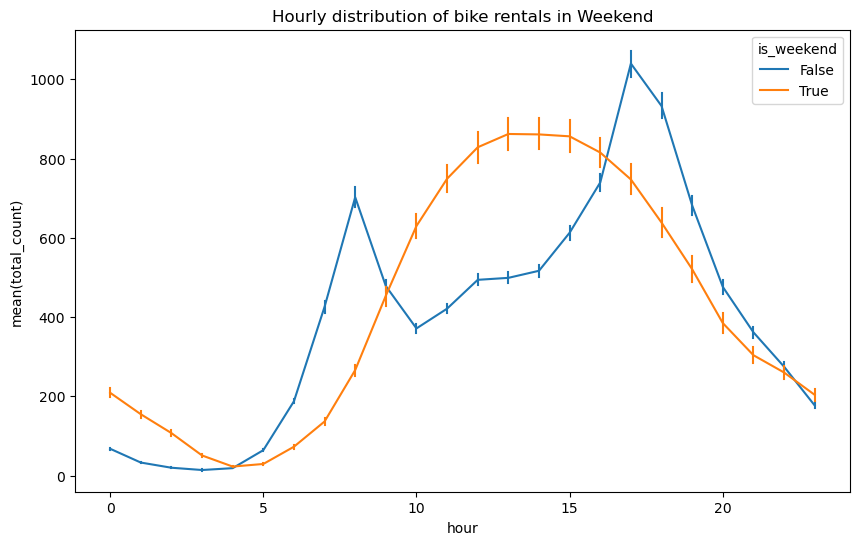

In [60]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Hour', y='Total_rides', data=dfH, hue='is_weekend', estimator='mean',err_style="bars")

# Add title and labels
plt.title('Hourly distribution of bike rentals in Weekend')
plt.xlabel('hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

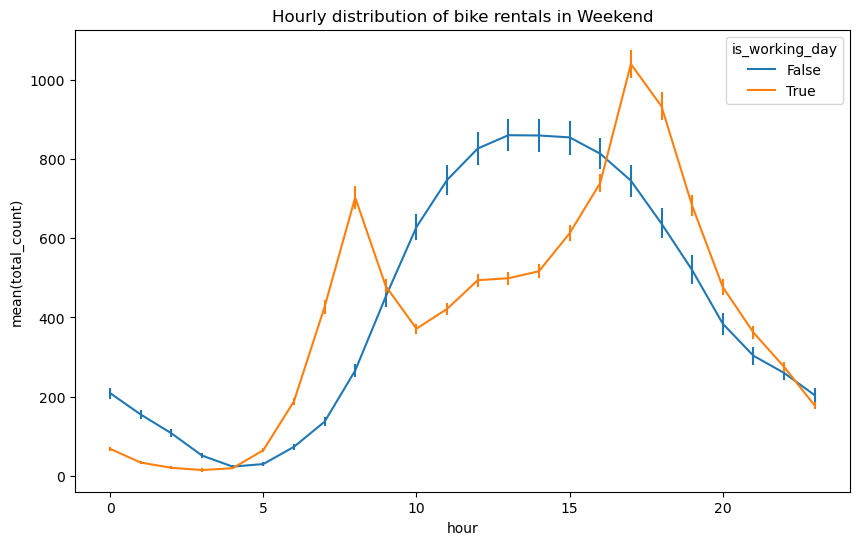

In [59]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Hour', y='Total_rides', data=dfH, hue='is_working_day', estimator='mean',err_style="bars")

# Add title and labels
plt.title('Hourly distribution of bike rentals in Weekend')
plt.xlabel('hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

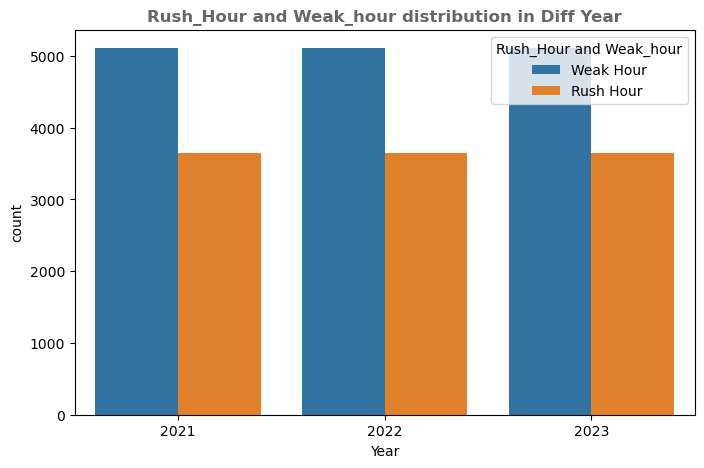

In [40]:
plt.figure(figsize=(8,5))
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), sharey=True)
sns.countplot(x = 'Year', hue = 'Rush_Hour and Weak_hour', data = dfH)
plt.title('Rush_Hour and Weak_hour distribution in Diff Year', fontweight="bold", alpha=0.6,)
plt.show()

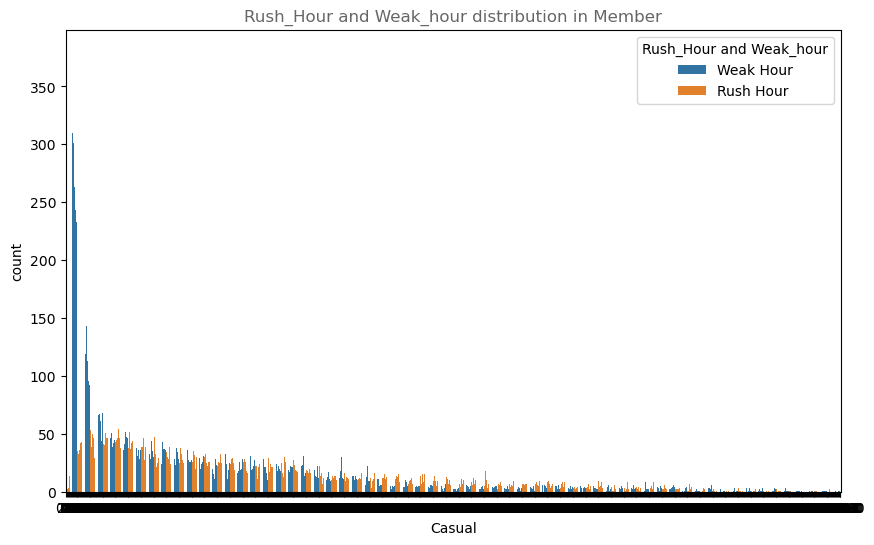

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Casual', hue = 'Rush_Hour and Weak_hour', data = dfH,)
plt.title('Rush_Hour and Weak_hour distribution in Member', alpha=0.6)
plt.show()

Text(0, 0.5, 'total_rides')

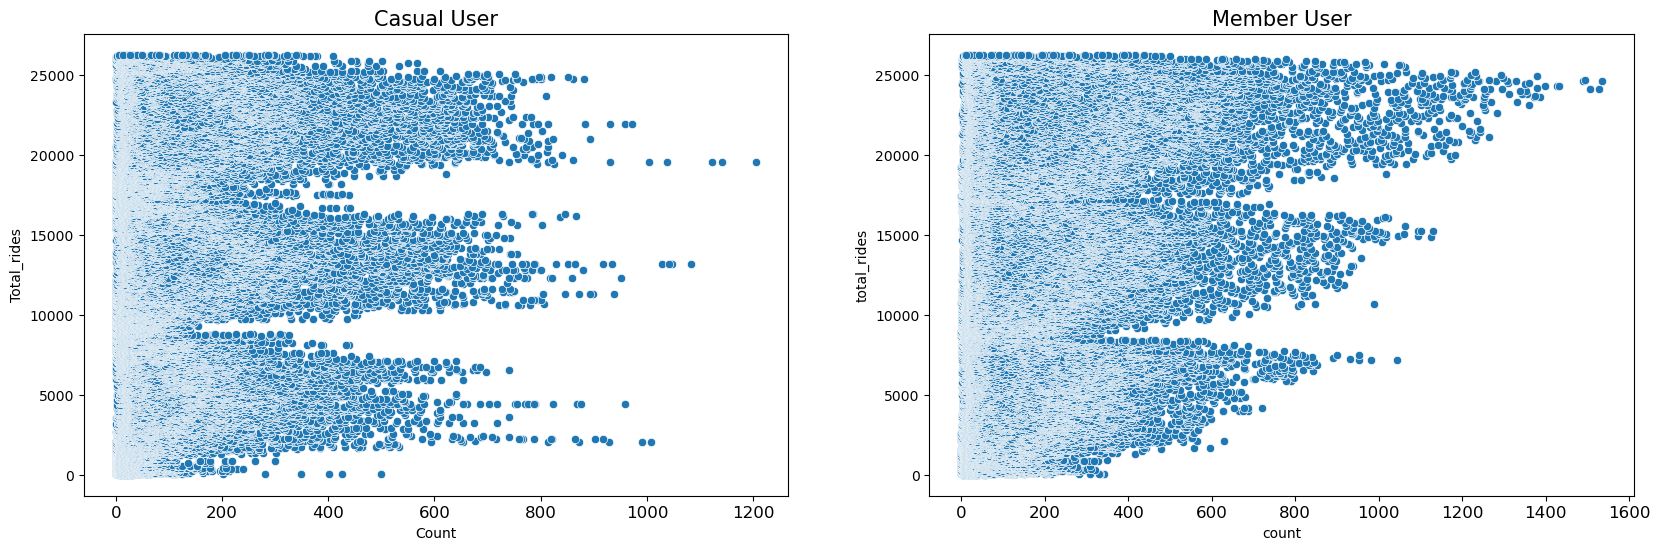

In [42]:
# Create the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Define colors
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot the first subplot (Casual User)
sns.scatterplot(x=dfH["Casual"].values, y=dfH.index, ax=ax[0]) 
ax[0].set_title("Casual User", fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Total_rides')

# Plot the first subplot (Casual User)
sns.scatterplot(x=dfH["Member"].values, y=dfH.index, ax=ax[1]) 
ax[1].set_title("Member User", fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].set_xlabel('count')
ax[1].set_ylabel('total_rides')

In [43]:
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Season,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day,Rush_Hour and Weak_hour
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,Winter,4,True,False,False,True,Weak Hour
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,Winter,4,True,False,False,True,Weak Hour
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,1,2021,Winter,4,True,False,False,True,Weak Hour
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,1,2021,Winter,4,True,False,False,True,Weak Hour
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,1,2021,Winter,4,True,False,False,True,Weak Hour


In [44]:
# dfH.drop(['Season', 'Rush_Hour and Weak_hour'], axis=1, inplace=True)

<!-- For Understanding purpose -->

In [45]:
# # Create a correlation matrix for red wine features
# plt.figure(figsize=(10,8))
# corr_matrix_Hour = dfH.corr()

# # Create a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_matrix_Hour, dtype=bool))
# sns.heatmap(corr_matrix_Hour, annot=True, cmap="YlGnBu",fmt= '.2f', square=True, mask=mask)
# plt.title('Correlation Matrix')
# plt.show()

In [46]:
dfH.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Count', 'Month', 'Year', 'Season',
       'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday',
       'is_working_day', 'Rush_Hour and Weak_hour'],
      dtype='object')

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error